In [1]:
import mne
import numpy as np
import pandas as pd
from scipy.signal import coherence, hilbert

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ====== CONFIGURACIÓN ======
edf_path = r"..\..\S03_datasets\chb01_01.edf"
sfreq_target = 256            # Frecuencia de muestreo a la que normalizamos (Hz)
fmin, fmax = 8, 13            # Banda alfa para la coherencia (puedes ajustar)

In [3]:
# ====== CARGA Y PREPROCESAMIENTO ======
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

Extracting EDF parameters from C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\OMEN CI7\AppData\Local\Temp\ipykernel_11056\1692581060.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



In [4]:
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(data)
corr_df = pd.DataFrame(corr_matrix, index=ch_names, columns=ch_names)

In [7]:
corr_df.head(2)

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
FP1-F7,1.000000,0.103592,-0.070391,0.008550,0.792282,0.402987,0.221081,0.130110,0.744005,0.462771,...,0.487322,0.003882,0.100852,0.437392,0.210561,0.070391,0.282011,-0.246338,-0.040157,0.003882
F7-T7,0.103592,1.000000,0.138700,0.005079,0.491057,0.419551,0.195553,0.135568,0.384312,0.217138,...,0.137333,0.091827,-0.043687,0.309492,0.211246,-0.138700,-0.599087,0.395563,-0.099850,0.091827


In [8]:
corr_df.shape

(23, 23)

In [9]:
corr_df.columns

Index(['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1'],
      dtype='object')

In [12]:
np.fill_diagonal(corr_df.values, 0)

<Axes: >

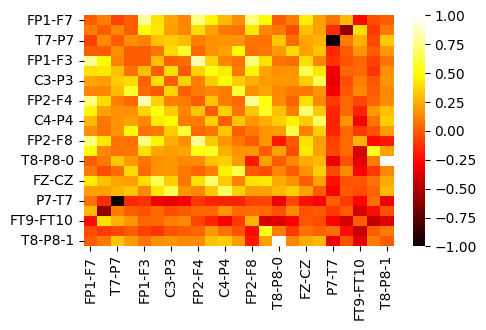

In [13]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr_df, cmap='hot')